In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('train_agriculture.xlsx')
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [4]:
df['Number_Weeks_Used'].value_counts()

20.0    209
30.0    194
25.0    165
40.0    133
35.0    128
       ... 
62.0      5
59.0      5
65.0      3
66.0      3
64.0      1
Name: Number_Weeks_Used, Length: 63, dtype: int64

In [5]:
df['Number_Weeks_Used'] = df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].median())

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
df.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.805392,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.968667,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


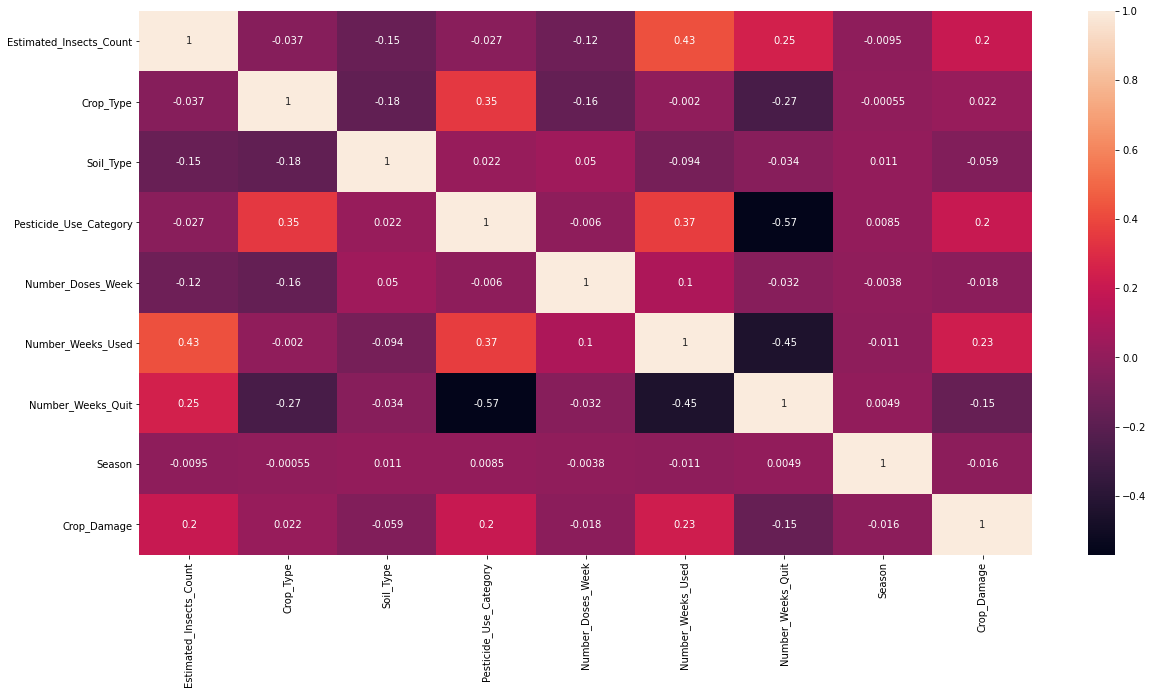

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019230F12CA0>,
      dtype=object)

<Figure size 1440x720 with 0 Axes>

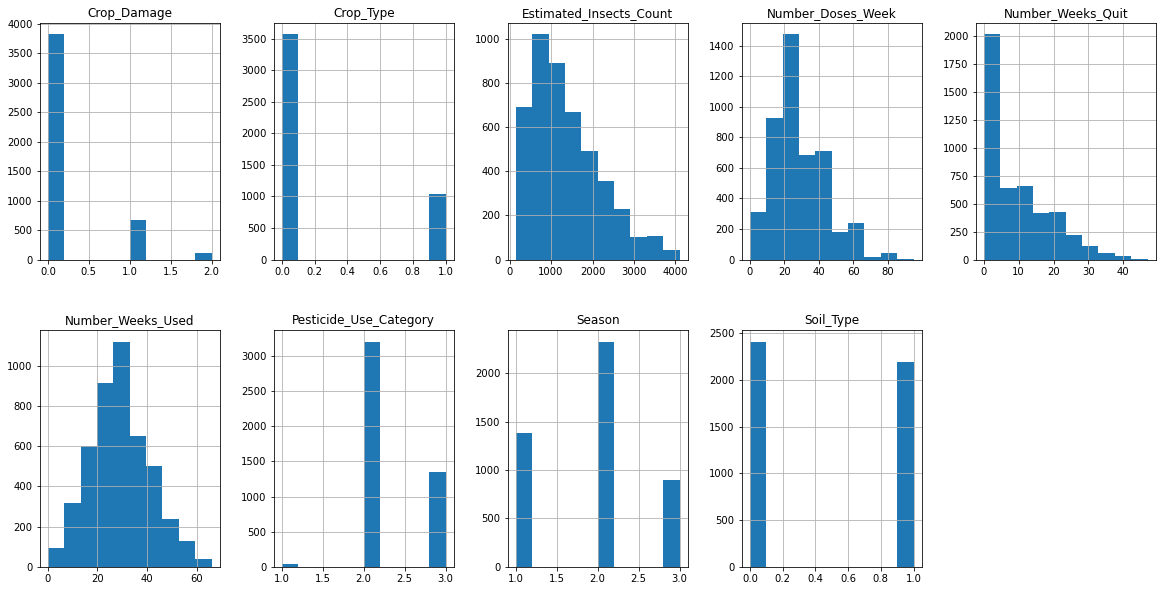

In [9]:
plt.figure(figsize=(20,10))
df.hist(figsize=(20,10), layout=(2,5))

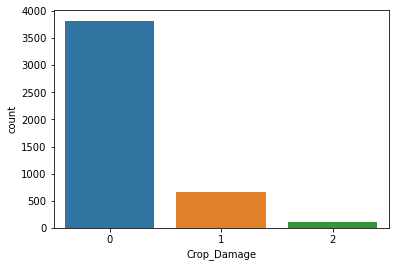

In [10]:
sns.countplot(df['Crop_Damage'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62]),
 <a list of 63 Text major ticklabel objects>)

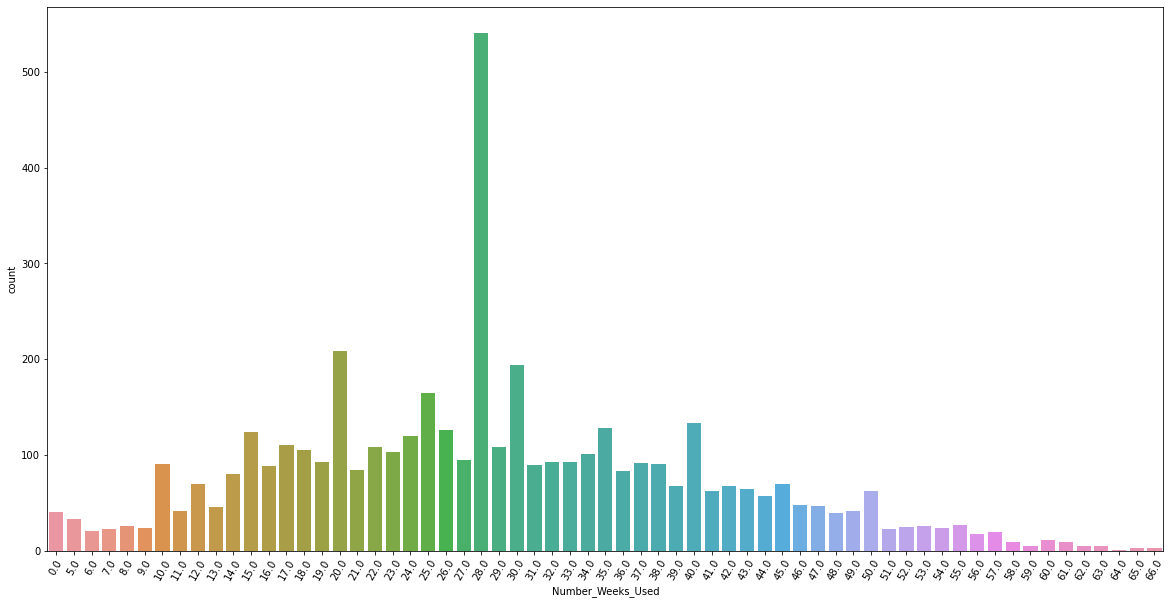

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(df['Number_Weeks_Used'])
plt.xticks(rotation=60)

In [12]:
df = df.drop('ID', axis=1)

In [13]:
from scipy.stats import zscore
z=np.abs(zscore(df))


df_new=df[(z<3).all(axis=1)]

In [28]:
from scipy.stats import skew

Estimated_Insects_Count
0.7895352280905547


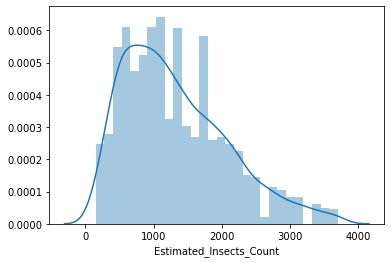

Crop_Type
1.3080984893980696


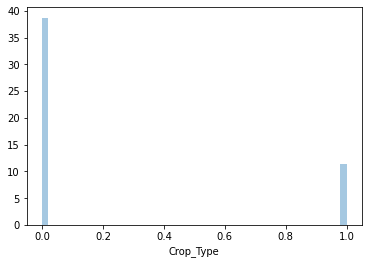

Soil_Type
0.0796970677316901


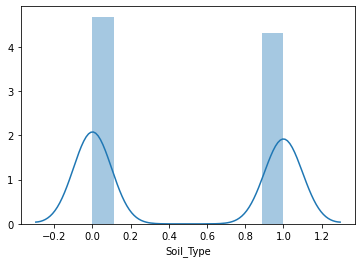

Pesticide_Use_Category
0.753319089798923


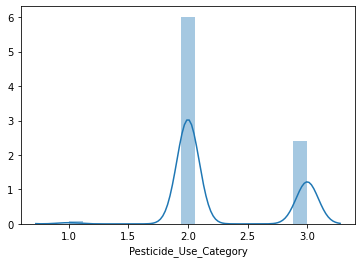

Number_Doses_Week
0.7108388748331104


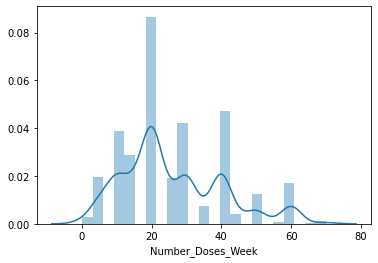

Number_Weeks_Used
0.297472210651332


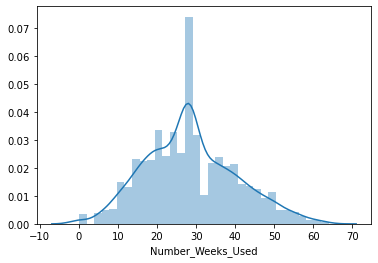

Number_Weeks_Quit
0.8131026044063374


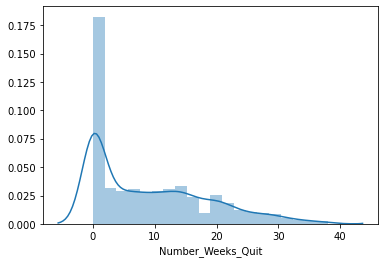

Season
0.14155676654406132


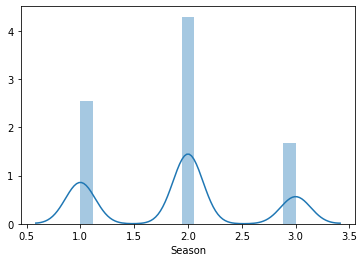

Crop_Damage
2.002518014466076


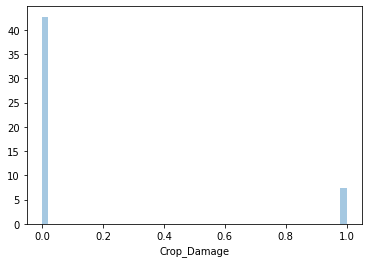

In [29]:
for col in df_new:
    print(col)
    print(skew(df_new[col]))
    
    plt.figure()
    sns.distplot(df_new[col])
    plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [15]:
X = df_new.drop(['Crop_Damage', 'Season', 'Number_Doses_Week'], axis=1)
y = df_new['Crop_Damage']

In [16]:
scalar = StandardScaler()
X = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)

In [17]:
X.head()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Weeks_Used,Number_Weeks_Quit
0,-1.480048,1.848947,-0.960945,-2.743472,-2.438039,-0.972383
1,-1.452620,1.848947,-0.960945,-2.743472,-2.438039,-0.972383
2,-1.389930,1.848947,-0.960945,-2.743472,-2.438039,-0.972383
3,-1.389930,1.848947,1.040642,-2.743472,-2.438039,-0.972383
4,-1.278916,1.848947,-0.960945,-2.743472,-2.438039,-0.972383


In [18]:
X.shape

(4370, 6)

In [19]:
y.shape

(4370,)

In [20]:
y = y.values.reshape(-1,1)

In [21]:
y.shape

(4370, 1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .22, random_state = 43)

In [23]:
svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8607068607068608
[[820   2]
 [132   8]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       822
           1       0.80      0.06      0.11       140

    accuracy                           0.86       962
   macro avg       0.83      0.53      0.52       962
weighted avg       0.85      0.86      0.81       962



In [24]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc.score(X_train, y_train)
preddtc = dtc.predict(X_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.7941787941787942
[[719 103]
 [ 95  45]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       822
           1       0.30      0.32      0.31       140

    accuracy                           0.79       962
   macro avg       0.59      0.60      0.60       962
weighted avg       0.80      0.79      0.80       962



In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn.score(X_train, y_train)
predknn = knn.predict(X_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.8336798336798337
[[765  57]
 [103  37]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91       822
           1       0.39      0.26      0.32       140

    accuracy                           0.83       962
   macro avg       0.64      0.60      0.61       962
weighted avg       0.81      0.83      0.82       962



In [26]:
svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
svc.score(X_train, y_train)
predsvc = svc.predict(X_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8607068607068608
[[820   2]
 [132   8]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       822
           1       0.80      0.06      0.11       140

    accuracy                           0.86       962
   macro avg       0.83      0.53      0.52       962
weighted avg       0.85      0.86      0.81       962



In [27]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_train, y_train)
predrfc = rfc.predict(X_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.840956340956341
[[770  52]
 [101  39]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       822
           1       0.43      0.28      0.34       140

    accuracy                           0.84       962
   macro avg       0.66      0.61      0.62       962
weighted avg       0.82      0.84      0.83       962



In [30]:
import joblib
joblib.dump(svc, 'crop_predict.pkl')

['crop_predict.pkl']